In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Our label is the last feature 'bening_0__mal_1'. All the features are missing-data-free, good. Also because this dataset is not that big.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Being this a classification problem, makes sense to check if the given labels are balanced:

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

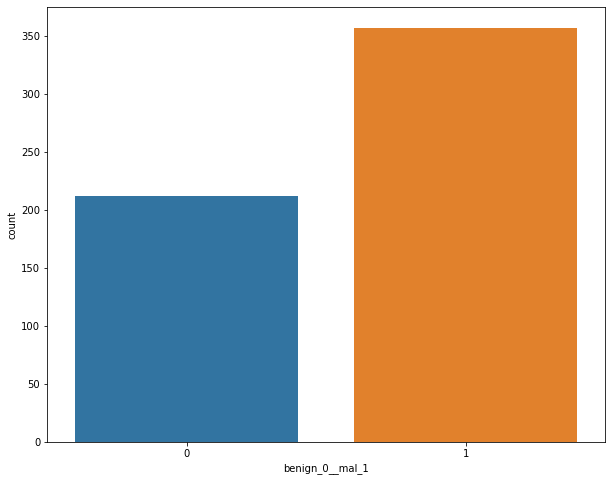

In [6]:
plt.figure(figsize=(10,8))


sns.countplot(df['benign_0__mal_1'])

Not super balanced, but acceptable, though.

<AxesSubplot:>

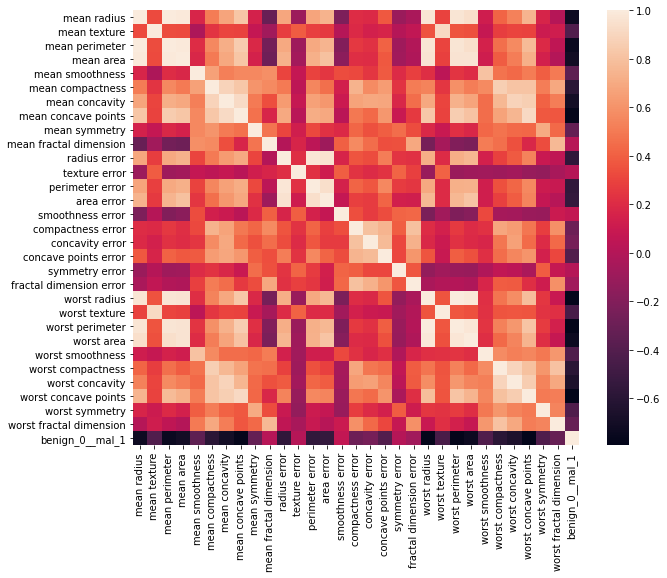

In [7]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr())

<AxesSubplot:>

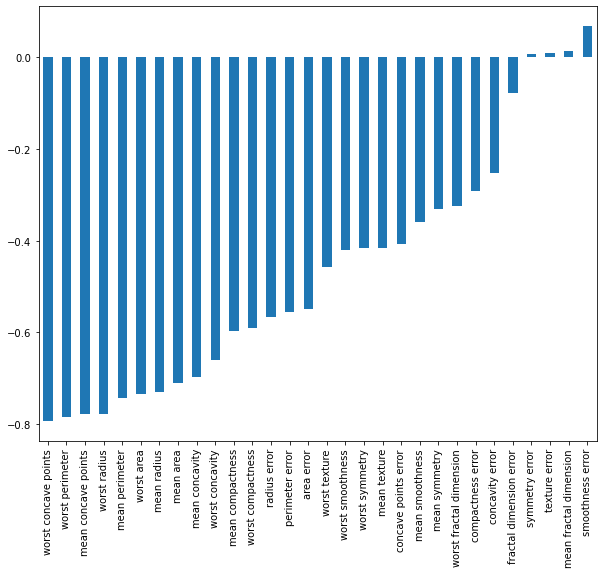

In [8]:
plt.figure(figsize=(10,8))
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='worst concave points'>

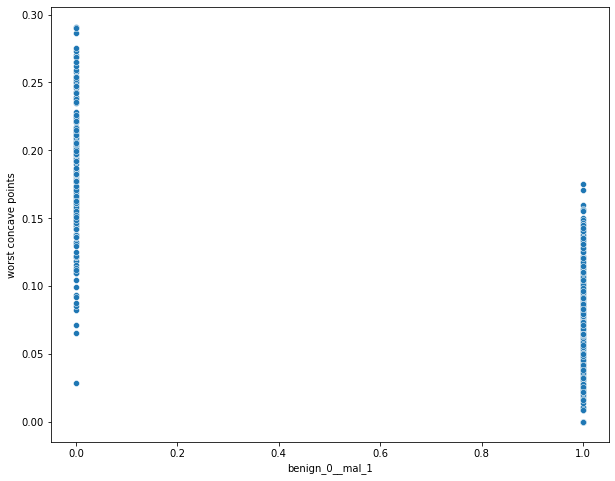

In [9]:
plt.figure(figsize=(10,8))


sns.scatterplot(x=df['benign_0__mal_1'],y=df['worst concave points'])

It actually seems that this feature is well clustered based off our label.

Let's build the model.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='mse')
#in this kind of predictive model, one should use 'binary_crossentropy' as the loss function, but for some reason
#doing so makes the kernel die while running the prediction, at least with my machine 

In [19]:
model.fit(x=X_train,
          y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),
         verbose=1)

Epoch 1/600
14/14 [==============================] - 0s 20ms/step - loss: 0.2556 - val_loss: 0.2398
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2403 - val_loss: 0.2302
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2284 - val_loss: 0.2202
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2171 - val_loss: 0.2083
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2070 - val_loss: 0.1929
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1859 - val_loss: 0.1743
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1693 - val_loss: 0.1547
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1375
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1311 - val_loss: 0.1195
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1180 - val_loss: 0.1060
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0236
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0251
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.0254
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0240
Epoch 87/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0239
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.0270
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0221
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.0239
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0240
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0209
Epoch 93/600


14/14 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0235
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0187
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0200
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0227
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0215
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0208
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0188
Epoch 171/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0220
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0186
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.0228
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0185
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0245
Epoch 247/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0226
Epoch 248/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0180
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0191
Epoch 250/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0225
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0192
Epoch 252/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0202
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0205
Epoch 254/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0192
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0254
Epoch 327/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0248
Epoch 328/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0202
Epoch 329/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0282
Epoch 330/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0228
Epoch 331/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0296
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0190
Epoch 333/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0241
Epoch 334/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0282
Epoch 335/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0185
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0332
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0247
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0264
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0272
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0286
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0269
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0280
Epoch 414/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0286
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0301
Epoch 416/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0269
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0390
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0403
Epoch 490/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0342
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0380
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0394
Epoch 493/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0358
Epoch 494/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0462
Epoch 495/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0341
Epoch 496/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0389
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0346
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0418
Epoch 570/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.0405
Epoch 571/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0203 - val_loss: 0.0658
Epoch 572/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.0280
Epoch 573/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0512
Epoch 574/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0324
Epoch 575/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0466
Epoch 576/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0408
Epoch 577/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0389
Epoch 578/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0367
Epoc

In [20]:
losses = pd.DataFrame(model.history.history)

In [21]:
losses.head()

,loss,val_loss
0,0.251840,0.239775
1,0.236040,0.230186
2,0.226709,0.220204
3,0.216005,0.208252
4,0.203120,0.192946


In [22]:
a=losses['loss'].values

Text(0.5, 1.0, 'Raw Model')

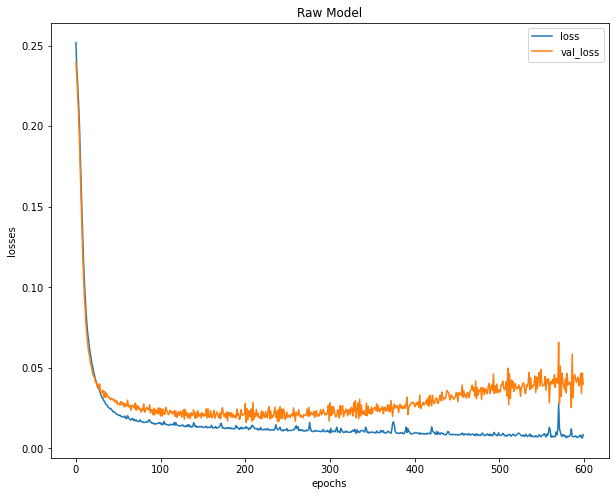

In [23]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()


sns.lineplot(x=np.arange(len(a)),y=losses['loss'].values)

sns.lineplot(x=np.arange(len(a)),y=losses['val_loss'].values)
ax.legend(['loss', 'val_loss'])

plt.xlabel('epochs')
plt.ylabel('losses')

plt.title('Raw Model')

In [24]:
pred = (model.predict(X_test) > 0.5).astype("int32")

# model.predict_classes(X_test) is deprecated

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        55
           1       0.98      0.92      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



[[53  2]
 [ 7 81]]


The model is quite accurate even if it rapidly overfits, as we see from the graph above. We want to make the model to stop when the valdation losses stop to decrease, so we can spare time and -more important- we can understan the optimal number of epochs to make the best predictive model. This tool is called **early stopping**:

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [29]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='mse')

#we need to recompile the model since before, after compiled it, we also run it. 

In [30]:
model.fit(x=X_train,y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),
         verbose=1,
         callbacks=[early_stop],
         batch_size=32)

Epoch 1/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2553 - val_loss: 0.2403
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2343 - val_loss: 0.2285
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2241 - val_loss: 0.2162
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2127 - val_loss: 0.2014
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1957 - val_loss: 0.1853
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1801 - val_loss: 0.1682
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1642 - val_loss: 0.1504
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1439 - val_loss: 0.1319
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1226 - val_loss: 0.1154
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1143 - val_loss: 0.1014
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0226
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0260
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0191 - val_loss: 0.0234
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0246
Epoch 87/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0237
Epoch 88/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0221
Epoch 89/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0245
Epoch 90/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0229
Epoch 91/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0226
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0237
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0214
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0202
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0275
Epoch 00166: early stopping


As we can see in the end, we the early stopping was triggered, and the model kept fitting for 92 epochs.

In [31]:
losses2 = pd.DataFrame(model.history.history)

In [32]:
losses2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      166 non-null    float64
 1   val_loss  166 non-null    float64
dtypes: float64(2)
memory usage: 2.7 KB


In [33]:
b=np.arange(len(losses2['loss'].values))

Text(0.5, 1.0, 'Model with Early Stopping')

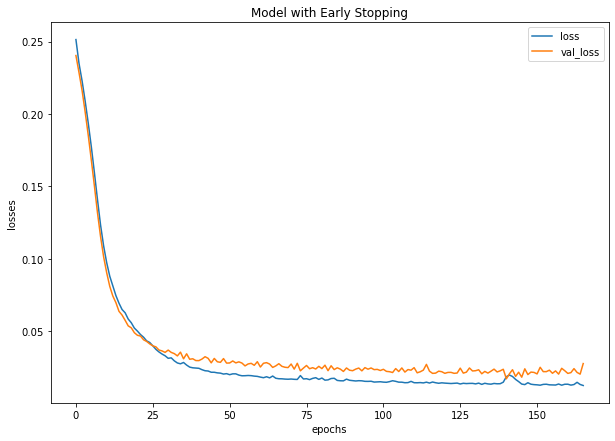

In [34]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

sns.lineplot(x=b,y=losses2['loss'].values)
sns.lineplot(x=b,y=losses2['val_loss'].values)

ax.legend(['loss','val_loss'])
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('Model with Early Stopping')

In [35]:
pred = (model.predict(X_test) > 0.5).astype("int32")

In [36]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



[[54  1]
 [ 3 85]]


We see that the model stopped with the given *patience* (how many epochs we allow the model to train after the trend stopped going in the desired direction) stops after around 130 epochs, and looking at the figure we notice that the trend drawn for the validation loss is indeed not bad.
We got a more accurate and at the same time faster model than the previous one. 

We want now to exploit one more tool to improve our model: the **dropout** technique. This allows the model to turn off a fixed number of neurons (to be decided at each layer); which neurons are dropped out is randomply chosed at each epoch: this creates more scorrelation, helping the model to fit over a larger number of epochs without overfitting.

The parameter inside the Dropout is the rate of dropped out neurons: $0.5$ means $50$% of neurons turned off. Typical values choosen are in the range $[0.2,0.5]$.

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='mse')

In [39]:
model.fit(x=X_train,y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),
         verbose=1,
         callbacks=[early_stop],
         batch_size=32)

Epoch 1/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2512 - val_loss: 0.2508
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2450 - val_loss: 0.2428
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2472 - val_loss: 0.2436
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2380 - val_loss: 0.2435
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2235 - val_loss: 0.2293
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2147 - val_loss: 0.2316
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2109 - val_loss: 0.2442
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2066 - val_loss: 0.2203
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1921 - val_loss: 0.2266
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1880 - val_loss: 0.2251
Epoch 11/

In [40]:
losses3 = pd.DataFrame(model.history.history)

In [41]:
c=np.arange(len(losses3['loss'].values))

Text(0.5, 1.0, 'Model with Dropout and Early Stopping')

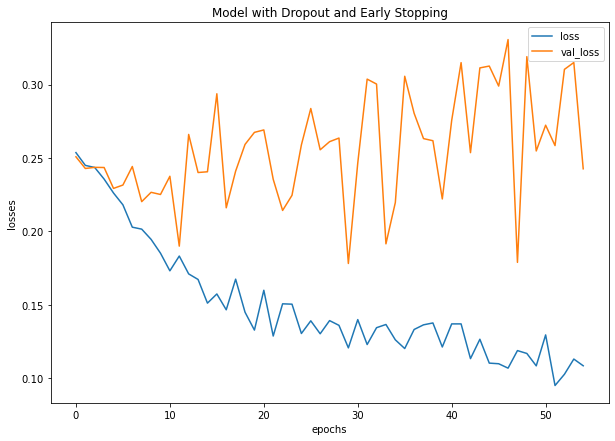

In [42]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

sns.lineplot(x=c,y=losses3['loss'].values)
sns.lineplot(x=c,y=losses3['val_loss'].values)

ax.legend(['loss','val_loss'])
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('Model with Dropout and Early Stopping')

In [43]:
pred = (model.predict(X_test) > 0.5).astype("int32")

In [44]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62        55
           1       0.75      0.86      0.80        88

    accuracy                           0.74       143
   macro avg       0.73      0.70      0.71       143
weighted avg       0.74      0.74      0.73       143



[[30 25]
 [12 76]]


So adding the Dropouts makes to model working worse. It is not clear yet, why it goes like this.